In [3]:
# Import Librarias
import pandas as pd
import numpy as np

# Import Libraries to Plot
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
sales = pd.read_csv("/home/miguel/proyectos/ds_associate/DS_Associate_DataCamp/Intro_Stats/data/beauty_sales_summary.csv")

In [8]:
# Explore The Data

display(sales.head(10))
print(sales.shape)
print(sales.info())

,product_id,product_name,category,units_sold,unit_price,revenue,month,channel,region
0,P1000,Producto_0,Makeup,453,15.70,7112.10,2023-01-01,Retail,Chile
1,P1000,Producto_0,Makeup,1662,30.04,49926.48,2023-02-01,Online,Chile
2,P1000,Producto_0,Makeup,429,16.39,7031.31,2023-03-01,Retail,Colombia
3,P1000,Producto_0,Makeup,286,36.57,10459.02,2023-04-01,Online,Perú
4,P1000,Producto_0,Makeup,439,26.49,11629.11,2023-05-01,Online,Colombia
5,P1000,Producto_0,Makeup,470,24.42,11477.40,2023-06-01,Retail,México
6,P1000,Producto_0,Makeup,777,48.72,37855.44,2023-07-01,Distributor,México
7,P1000,Producto_0,Makeup,619,38.55,23862.45,2023-08-01,Retail,Chile
8,P1000,Producto_0,Makeup,488,19.40,9467.20,2023-09-01,Online,Chile
9,P1000,Producto_0,Makeup,469,19.59,9187.71,2023-10-01,Online,Perú


(480, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    480 non-null    object 
 1   product_name  480 non-null    object 
 2   category      480 non-null    object 
 3   units_sold    480 non-null    int64  
 4   unit_price    480 non-null    float64
 5   revenue       480 non-null    float64
 6   month         480 non-null    object 
 7   channel       480 non-null    object 
 8   region        480 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 33.9+ KB
None


In [11]:
# The Feature 'category' to catogory type
sales['category'] = sales['category'].astype('category')


In [ ]:
# Convert 'month' column to datetime format
sales['month'] = pd.to_datetime(sales['month'])

In [12]:
sales['category'].unique()

['Makeup', 'Fragrance', 'Skincare', 'Haircare']
Categories (4, object): ['Fragrance', 'Haircare', 'Makeup', 'Skincare']

In [13]:
sales.groupby('category').agg({'units_sold': 'sum',
                               'unit_price': 'mean',
                               'revenue': 'sum'
                               })

/tmp/ipykernel_1479/1181592339.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales.groupby('category').agg({'units_sold': 'sum',


,units_sold,unit_price,revenue
category,,,
Fragrance,34710,28.271458,1011344.23
Haircare,14448,28.243333,411226.07
Makeup,117316,27.947269,3266143.48
Skincare,53293,27.696042,1503282.15


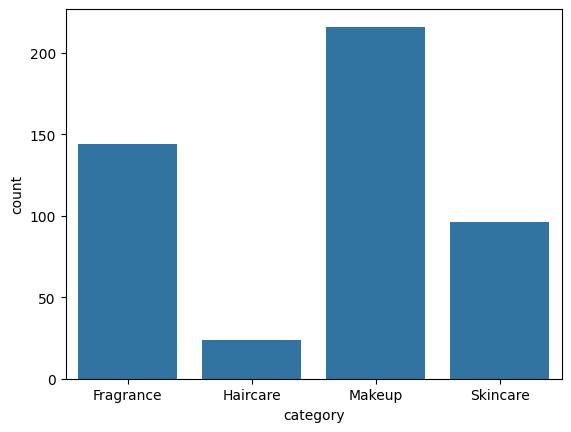

In [16]:
# Countplot expects a categorical variable for x or y, not a numeric one like 'units_sold'
sns.countplot(data=sales[['category','revenue']], x='category')
plt.show()
